<a href="https://colab.research.google.com/github/yy0750/Stock-Price-Prediction-using-HMM-and-ARIMA/blob/main/%08%08HMM_ARIMA_Stoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Appendix A.1. Preparation for Model Construction/Modeling

#### Appendix A.1.1. Importing Necessary Modeules

In [53]:
!pip install hmmlearn
!pip install pmdarima

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import yfinance as yf
import pmdarima as pm
from hmmlearn import hmm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import ndiffs
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [55]:
start_date = '2021-12-10'
end_date = '2023-11-17'

stock_code = '005930.KS' #Sk하이닉스: '00660.KS'
df = yf.download(stock_code, start=start_date, end=end_date)
df.reset_index(inplace=True)

df.insert(0, 'ID', df.index)
df.drop('Adj Close', axis=1, inplace=True)

[*********************100%%**********************]  1 of 1 completed


In [56]:
df.head()

,ID,Date,Open,High,Low,Close,Volume
0,0,2021-12-10,77400.0,77600.0,76800.0,76900.0,9155219
1,1,2021-12-13,77200.0,78300.0,76500.0,76800.0,15038750
2,2,2021-12-14,76500.0,77200.0,76200.0,77000.0,10976660
3,3,2021-12-15,76400.0,77600.0,76300.0,77600.0,9584939
4,4,2021-12-16,78500.0,78500.0,77400.0,77800.0,11996128


### Appendix A.1.3 Data formatting and Normalization

In [57]:
df['Avg'] = pd.Series([((row.Open + row.High + row.Low + row.Close)/4) for index, row in df.iterrows()])
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

X = df.values[:, [0, 7]]
X = np.nan_to_num(X)
X = StandardScaler().fit_transform(X)

#### Appendix A.1.4 Clustering
###### K-Means Clustering
###### Preliminary Clustering

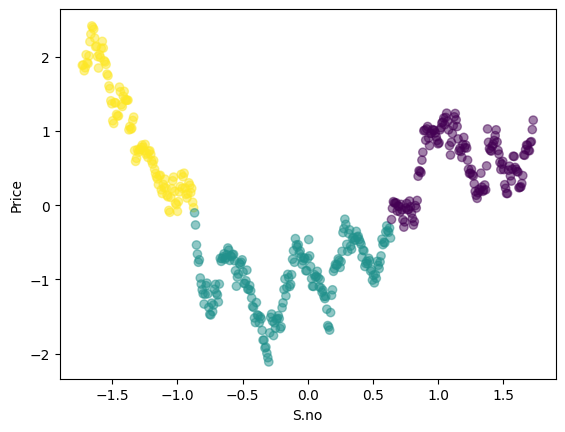

In [58]:
clusterNum = 3
k_means = KMeans(init = 'k-means++', n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_

df['State'] = labels

plt.scatter(X[:, 0], X[:, 1], c=labels.astype(np.float64), alpha=0.5);
plt.xlabel('S.no');
plt.ylabel('Price');

In [59]:
pre_means = []
pre_covars = []

for i in [0, 1, 2]:
    tdf = df[df.State == i]

    pre_means.append(tdf['Avg'].sum() / tdf['Avg'].count())
    pre_covars.append(tdf['Avg'].std() ** 2)

##### Clustering the log-likelihoods


In [60]:
pre_prices = df['Avg'].tolist()

pre_training_ll = [np.nan] * len(pre_prices)

for i in range(3, len(pre_prices)):  #for i in range((len(pre_prices))): - Method 2
    print('Datapoint: ', i)
    #Initialize
    pre_model = hmm.GMMHMM(n_components = 3, n_mix=1, n_iter = 100, covariance_type='diag', init_params='')
    pre_model.startprob_ = np.array([1/3, 1/3, 1/3])
    pre_model.transmat_ = np.array([[1/3, 1/3, 1/3], [1/3, 1/3, 1/3], [1/3, 1/3, 1/3]])
    pre_model.means_ = np.array([pre_means[0], pre_means[1], pre_means[2]]).reshape(3, 1)
    pre_model.covars_ = np.array([pre_covars[0], pre_covars[1], pre_covars[2]]).reshape(3, 1)
    pre_model.weights_ = np.array([1, 1, 1]).reshape(3,1)

    # Samples
    X = np.array(pre_prices[max(i-4, 0):i]).reshape(i - max(i-4, 0),1)

    # Method 2
    #X = np.array([[df['Open'][i]], df['Close'][i]], df['High'][i]], df['Low'][i]]).reshape(4, 1)

    X = np.nan_to_num(X)

    # Training
    try:
        pre_model.fit(X)
    except ValueError:
        continue

    pre_training_ll[i] = pre_model.monitor_.history[0]

df['pre_ll'] = np.nan_to_num(pre_training_ll)

Datapoint:  3
Datapoint:  4
Datapoint:  5
Datapoint:  6
Datapoint:  7
Datapoint:  8
Datapoint:  9
Datapoint:  10


Datapoint:  11
Datapoint:  12
Datapoint:  13
Datapoint:  14
Datapoint:  15
Datapoint:  16
Datapoint:  17
Datapoint:  18


Datapoint:  19
Datapoint:  20
Datapoint:  21
Datapoint:  22
Datapoint:  23


Datapoint:  24


Datapoint:  25
Datapoint:  26
Datapoint:  27
Datapoint:  28
Datapoint:  29
Datapoint:  30
Datapoint:  31


Datapoint:  32
Datapoint:  33
Datapoint:  34
Datapoint:  35
Datapoint:  36
Datapoint:  37
Datapoint:  38


Datapoint:  39
Datapoint:  40
Datapoint:  41
Datapoint:  42
Datapoint:  43
Datapoint:  44
Datapoint:  45


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


Datapoint:  46
Datapoint:  47
Datapoint:  48
Datapoint:  49
Datapoint:  50


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


Datapoint:  51
Datapoint:  52
Datapoint:  53
Datapoint:  54
Datapoint:  55
Datapoint:  56
Datapoint:  57


Datapoint:  58
Datapoint:  59
Datapoint:  60
Datapoint:  61
Datapoint:  62
Datapoint:  63
Datapoint:  64


Datapoint:  65
Datapoint:  66
Datapoint:  67
Datapoint:  68
Datapoint:  69
Datapoint:  70


Datapoint:  71
Datapoint:  72
Datapoint:  73
Datapoint:  74
Datapoint:  75
Datapoint:  76
Datapoint:  77


Datapoint:  78
Datapoint:  79
Datapoint:  80
Datapoint:  81
Datapoint:  82
Datapoint:  83
Datapoint:  84


Datapoint:  85
Datapoint:  86
Datapoint:  87
Datapoint:  88
Datapoint:  89
Datapoint:  90
Datapoint:  91
Datapoint: 

 92
Datapoint:  93
Datapoint:  94
Datapoint:  95
Datapoint:  96
Datapoint:  97


Datapoint:  98
Datapoint:  99
Datapoint:  100
Datapoint:  101
Datapoint:  102
Datapoint:  103
Datapoint:  104


Datapoint:  105
Datapoint:  106
Datapoint:  107
Datapoint:  108
Datapoint:  109
Datapoint:  110
Datapoint:  111


Datapoint:  112
Datapoint:  113
Datapoint:  114
Datapoint:  115
Datapoint:  116
Datapoint:  117
Datapoint:  118


Datapoint:  119
Datapoint:  120
Datapoint:  121
Datapoint:  122
Datapoint:  123
Datapoint:  124
Datapoint:  125


Datapoint:  126
Datapoint:  127
Datapoint:  128
Datapoint:  129
Datapoint:  130
Datapoint:  131


Datapoint:  132
Datapoint:  133
Datapoint:  134
Datapoint:  135
Datapoint:  136
Datapoint:  137
Datapoint:  138
Datapoint:  139


Datapoint:  140
Datapoint:  141
Datapoint:  142
Datapoint:  143
Datapoint:  144
Datapoint:  145
Datapoint:  146


Datapoint:  147
Datapoint:  148
Datapoint:  149
Datapoint:  150
Datapoint:  151
Datapoint:  152
Datapoint:  153
Datapoint:  154


Datapoint:  155


Datapoint:  156
Datapoint:  157


Datapoint:  158


Datapoint:  159


Datapoint:  160


Datapoint:  161


Datapoint:  162


Datapoint:  163


Datapoint:  164


Datapoint:  165
Datapoint:  166


Datapoint:  167


Datapoint:  168
Datapoint:  169


Datapoint:  170


Datapoint:  171


Datapoint:  172
Datapoint:  173


Datapoint:  174


Datapoint:  175


Datapoint:  176
Datapoint:  177


Datapoint:  178
Datapoint:  179


Datapoint:  180


Datapoint:  181
Datapoint:  182


Datapoint:  183
Datapoint:  184
Datapoint:  185
Datapoint:  186


Datapoint:  187


Datapoint:  188


Datapoint:  189


Datapoint:  190


Datapoint:  191


Datapoint:  192


Datapoint:  193


Datapoint:  194


Datapoint:  195


Datapoint:  196


Datapoint:  197


Datapoint:  198


Datapoint:  199


Datapoint:  200
Datapoint:  201


Datapoint:  202


Datapoint:  203
Datapoint:  204


Datapoint:  205


Datapoint:  206
Datapoint:  207


Datapoint:  208


Datapoint:  209


Datapoint:  210


Datapoint:  211


Datapoint:  212


Datapoint:  213


Datapoint:  214
Datapoint:  215
Datapoint:  216


Datapoint:  217


Datapoint:  218
Datapoint:  219


Datapoint:  220


Datapoint:  221


Datapoint:  222


Datapoint:  223


Datapoint:  224


Datapoint:  225


Datapoint:  226


Datapoint:  227


Datapoint:  228


Datapoint:  229


Datapoint:  230


Datapoint:  231


Datapoint:  232


Datapoint:  233


Datapoint:  234


Datapoint:  235
Datapoint:  236


Datapoint:  237
Datapoint:  238


Datapoint:  239


Datapoint:  240
Datapoint:  241


Datapoint:  242
Datapoint:  243


Datapoint:  244
Datapoint:  245


Datapoint:  246
Datapoint:  247


Datapoint:  248


Datapoint:  249


Datapoint:  250
Datapoint:  251


Datapoint:  252


Datapoint:  253


Datapoint:  254


Datapoint:  255


Datapoint:  256


Datapoint:  257


Datapoint:  258
Datapoint:  259
Datapoint:  260
Datapoint:  261
Datapoint:  262
Datapoint:  263
Datapoint:  264


Datapoint:  265
Datapoint:  266
Datapoint:  267
Datapoint:  268
Datapoint:  269
Datapoint:  270


Datapoint:  271
Datapoint:  272
Datapoint:  273
Datapoint:  

274
Datapoint:  275


Datapoint:  276


Datapoint:  277
Datapoint:  278
Datapoint:  279


Datapoint:  280
Datapoint:  281


Datapoint:  282
Datapoint:  283
Datapoint:  284


Datapoint:  285
Datapoint:  286
Datapoint:  287


Datapoint:  288
Datapoint:  289


Datapoint:  290
Datapoint:  291
Datapoint:  292
Datapoint:  293


Datapoint:  294
Datapoint:  295
Datapoint:  296
Datapoint:  297
Datapoint:  298
Datapoint:  299
Datapoint:  300


Datapoint:  301
Datapoint:  302
Datapoint:  303
Datapoint:  304
Datapoint:  305
Datapoint:  306


Datapoint:  307
Datapoint:  308
Datapoint:  309
Datapoint:  310
Datapoint:  311
Datapoint:  312
Datapoint:  313


Datapoint:  314
Datapoint:  315
Datapoint:  316
Datapoint:  317
Datapoint:  318
Datapoint:  319
Datapoint:  320


Datapoint:  321
Datapoint:  322
Datapoint:  323
Datapoint:  324
Datapoint:  325
Datapoint:  326
Datapoint:  327


Datapoint:  328
Datapoint:  329
Datapoint:  330
Datapoint:  331
Datapoint:  332
Datapoint:  333


Datapoint:  334
Datapoint:  335
Datapoint:  336
Datapoint:  337
Datapoint:  338
Datapoint:  339
Datapoint:  340


Datapoint:  341
Datapoint:  342
Datapoint:  343
Datapoint:  344
Datapoint:  345
Datapoint:  346
Datapoint:  347


Datapoint:  348
Datapoint:  349
Datapoint:  350
Datapoint:  351
Datapoint:  352
Datapoint:  353
Datapoint:  354


Datapoint:  355
Datapoint:  356
Datapoint:  357
Datapoint:  358
Datapoint:  359
Datapoint:  360
Datapoint:  361


Datapoint:  362
Datapoint:  363
Datapoint:  364
Datapoint:  365
Datapoint:  366
Datapoint:  367


Datapoint:  368
Datapoint:  369
Datapoint:  370
Datapoint:  371
Datapoint:  372
Datapoint:  373
Datapoint:  374


Datapoint:  375
Datapoint:  376
Datapoint:  377
Datapoint:  378
Datapoint:  379
Datapoint:  380
Datapoint:  381


Datapoint:  382
Datapoint:  383
Datapoint:  384
Datapoint:  385
Datapoint:  386
Datapoint:  387
Datapoint:  388


Datapoint:  389
Datapoint:  390
Datapoint:  391
Datapoint:  392
Datapoint:  393
Datapoint:  394
Datapoint:  395


Datapoint:  396
Datapoint:  397
Datapoint:  398
Datapoint:  399
Datapoint:  400
Datapoint:  401
Datapoint:  402


Datapoint:  403
Datapoint:  404
Datapoint:  405
Datapoint:  406
Datapoint:  407
Datapoint:  408
Datapoint:  409


Datapoint:  410
Datapoint:  411
Datapoint:  412
Datapoint:  413
Datapoint:  414
Datapoint:  415


Datapoint:  416
Datapoint:  417
Datapoint:  418
Datapoint:  419
Datapoint:  420
Datapoint:  421
Datapoint:  422


Datapoint:  423
Datapoint:  424
Datapoint:  425
Datapoint:  426
Datapoint:  427
Datapoint:  428


Datapoint:  429
Datapoint:  430
Datapoint:  431
Datapoint:  432
Datapoint:  433
Datapoint:  434
Datapoint:  435


Datapoint:  436
Datapoint:  437
Datapoint:  438
Datapoint:  439
Datapoint:  440
Datapoint:  441
Datapoint:  442


Datapoint:  443
Datapoint:  444
Datapoint:  445
Datapoint:  446
Datapoint:  447
Datapoint:  448
Datapoint:  449


Datapoint:  450
Datapoint:  451
Datapoint:  452
Datapoint:  453
Datapoint:  454
Datapoint:  455
Datapoint:  456


Datapoint:  457
Datapoint:  458
Datapoint:  459
Datapoint:  460
Datapoint:  461
Datapoint:  462


Datapoint:  463
Datapoint:  464
Datapoint:  465
Datapoint:  466
Datapoint:  467
Datapoint:  468
Datapoint:  469


Datapoint:  470
Datapoint:  471
Datapoint:  472
Datapoint:  473
Datapoint:  474


##### Refining the clusters (Clustering the log_likelihoods):

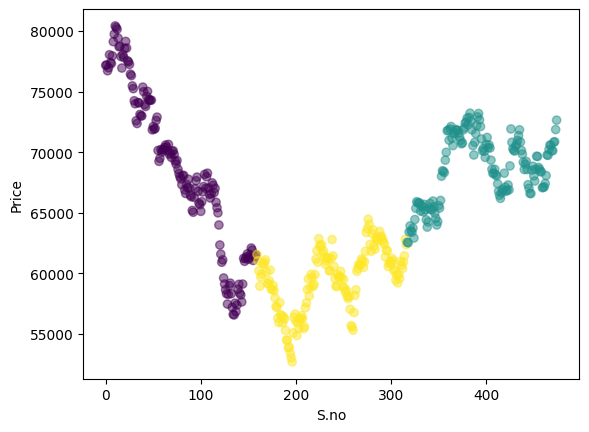

In [61]:
X = df.values[:, [0, 9]]
X = np.nan_to_num(X)
X = StandardScaler().fit_transform(X)

clusterNum = 3
k_means = KMeans(init = 'k-means++', n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_

df['State'] = labels

plt.scatter(df['ID'], df['Avg'], c=df['State'].astype(np.float64), alpha=0.5);
plt.xlabel('S.no');
plt.ylabel('Price');

## Appendix A.2. Model Construction/Modeling


#### Appendix A.2.1 Mixture Model
##### Low Economy

<ipython-input-62-18094e1c0f12>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_df.drop(['ID'], axis=1, inplace=True)
<ipython-input-62-18094e1c0f12>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_df['ID'] = low_df.index
<ipython-input-62-18094e1c0f12>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_df['Mix

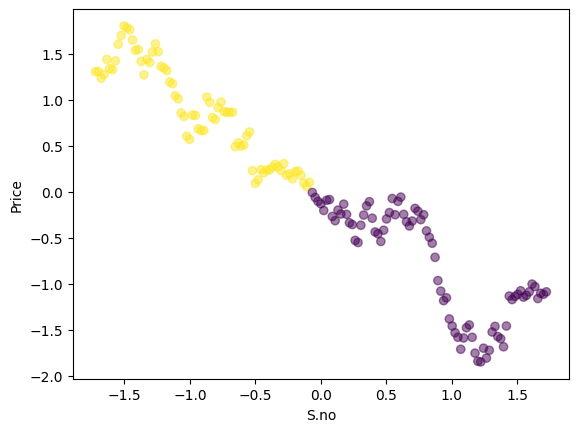

In [62]:
low_df = df[df.State == 0]

low_df.reset_index(inplace=True)
low_df.drop(['ID'], axis=1, inplace=True)
low_df['ID'] = low_df.index

X = low_df.values[:, [10, 7]]
X = np.nan_to_num(X)
X = StandardScaler().fit_transform(X)

clusterNum = 2
low_k_means = KMeans(init='k-means++', n_clusters=clusterNum, n_init=12)
low_k_means.fit(X)
labels = low_k_means.labels_
low_df['Mix'] = labels

plt.scatter(X[:, 0], X[:, 1], c=labels.astype(np.float64), alpha=0.5);
plt.xlabel('S.no');
plt.ylabel('Price');

low_means = []
low_covars = []
low_weights = []

for i in [0, 1]:
    tdf = low_df[low_df.Mix == i]

    #Mean
    low_means.append(tdf['Avg'].sum() / tdf['Avg'].count())

    #Variance
    low_covars.append(tdf['Avg'].std() ** 2)

    #Weights
    tdf = low_df[low_df.Mix == 0]
    low_weights.append(tdf['Avg'].count() / low_df['Avg'].count())
    low_weights.append(1 - low_weights[0])

##### Medium Economy

<ipython-input-63-9acbba666d0d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medium_df.drop(['ID'], axis=1, inplace=True)
<ipython-input-63-9acbba666d0d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medium_df['ID'] = medium_df.index
<ipython-input-63-9acbba666d0d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  me

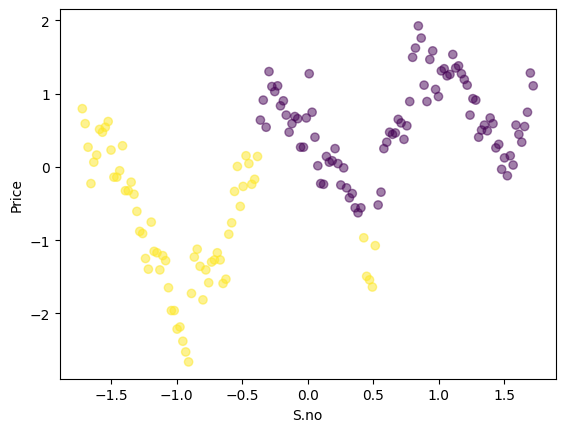

In [63]:
medium_df = df[df.State == 2]

medium_df.reset_index(inplace=True)
medium_df.drop(['ID'], axis=1, inplace=True)
medium_df['ID'] = medium_df.index

X = medium_df.values[:, [10, 7]]
X = np.nan_to_num(X)
X = StandardScaler().fit_transform(X)

clusterNum = 2
medium_k_means = KMeans(init='k-means++', n_clusters=clusterNum, n_init=12)
medium_k_means.fit(X)
labels = medium_k_means.labels_
medium_df['Mix'] = labels

plt.scatter(X[:, 0], X[:, 1], c=labels.astype(np.float64), alpha=0.5)
plt.xlabel('S.no')
plt.ylabel('Price')

medium_means = []
medium_covars = []
medium_weights = []

for i in [0, 1]:
    tdf = medium_df[medium_df.Mix == i]

    #Mean
    medium_means.append(tdf['Avg'].sum() / tdf['Avg'].count())

    #Variance
    medium_covars.append(tdf['Avg'].std() ** 2)

    #Weights
    tdf = medium_df[medium_df.Mix == 0]
    medium_weights.append(tdf['Avg'].count() / medium_df['Avg'].count())
    medium_weights.append(1 - medium_weights[0])

##### High Economy

<ipython-input-64-5f15762a6f4f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_df.drop(['ID'], axis=1, inplace=True)
<ipython-input-64-5f15762a6f4f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_df['ID'] = high_df.index
<ipython-input-64-5f15762a6f4f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_df[

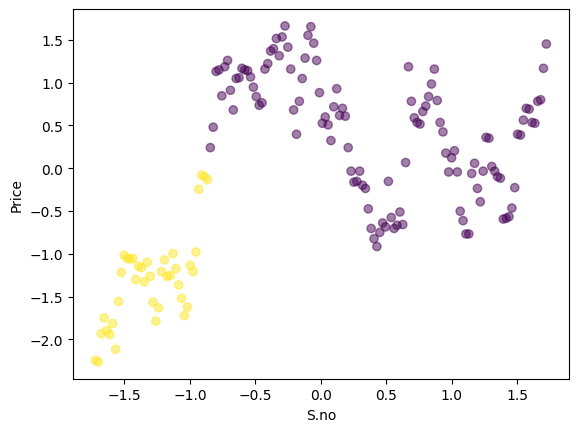

In [64]:
high_df = df[df.State == 1]

high_df.reset_index(inplace=True)
high_df.drop(['ID'], axis=1, inplace=True)
high_df['ID'] = high_df.index

X = high_df.values[:, [10, 7]]
X = np.nan_to_num(X)
X = StandardScaler().fit_transform(X)

clusterNum = 2
high_K_means = KMeans(init = 'k-means++', n_clusters = clusterNum, n_init = 12)
high_K_means.fit(X)
labels = high_K_means.labels_
high_df['Mix'] = labels

plt.scatter(X[:, 0], X[:, 1], c=labels.astype(np.float64), alpha=0.5)
plt.xlabel('S.no')
plt.ylabel('Price')

high_means = []
high_covars = []
high_weights = []

for i in [0, 1]:
    tdf = high_df[high_df.Mix == i]

    #Mean
    high_means.append(tdf['Avg'].sum() / tdf['Avg'].count())

    #Variance
    high_covars.append(tdf['Avg'].std() ** 2)

    #Weights
    tdf = high_df[high_df.Mix == 0]
    high_weights.append(tdf['Avg'].count() / high_df['Avg'].count())
    high_weights.append(1 - high_weights[0])

#### Appendix A.2.2 HMM Training and Testing

In [65]:
prices = df['Close'].tolist()

training_ll = [None] * len(prices)
lls = [None] * len(prices)
predicted_prices = [None] * (len(prices)+1)
epsilon = 0.2
curr_ll = 0

for i in range(3, len(prices)): #{for i in range(len(prices)):} - Method 2
    print('Datapoint: ', i)
    #Initialize
    model = hmm.GMMHMM(n_components=3, n_mix=2, n_iter=100, covariance_type='diag', init_params='')
    model.startprob_ = np.array([1/3, 1/3, 1/3])
    model.transmat_ = np.array([[1/3, 1/3, 1/3], [1/3, 1/3, 1/3], [1/3, 1/3, 1/3]])

    model.means_ = np.array([[medium_means[0], medium_means[1]], [high_means[0], high_means[1]], [low_means[0], low_means[1]]]).reshape(3, 2, 1)
    model.covars_ = np.array([[medium_covars[0], medium_covars[1]], [high_covars[0], high_covars[1]], [low_covars[0], low_covars[1]]]).reshape(3, 2, 1)
    model.weights_ = np.array([[medium_weights[0], medium_weights[1]], [high_weights[0], high_weights[1]], [low_weights[0], low_weights[1]]])

    #Samples
    X = np.array(prices[max(i-4, 0):i]).reshape(i - max(i-4, 0),1)

    #Method 2
    #X = np.array([df['Open'][i], df['Close'][i], df['High'][i], df['Low'][i]]).reshape(4, 1)
    X = np.nan_to_num(X)

    #Training
    try:
        model.fit(X)
    except ValueError:
        pass


    ll_arr = np.array(model.monitor_.history)
    ll_arr = ll_arr[~np.isnan(ll_arr)]

    # Log-likelihood
    try:
        #curr_ll = ll_arr[0] # - First Iteration
        #curr_ll = np.median(ll_arr) # - Middle Iteration
        curr_ll = ll_arr[-1] # - Last Iteration
    except ValueError:
        pass

    lls[i] = (curr_ll)

    #Predict
    if i > 427:
        diff = []
        for j in range(3, i): #{for j in range(i):} - Method 2
            if lls[j] != None:
                if lls[j] < (curr_ll + epsilon) and lls[j] > (curr_ll - epsilon):
                    diff.append(prices[j+1] - prices[j])

        if len(diff) > 0:
            min_diff = diff[np.argmin(np.abs(diff))]
            predicted_prices[i+1] = prices[i] + min_diff

df['PredictedPrices'] = pd.Series(predicted_prices)

/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  3


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  4


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  5


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  6


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  7


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  8


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  9


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  10


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/_emissions.py:208: RuntimeWarning: divide by zero encountered in log
  log_cur_weights = np.log(self.weights_[i_comp])


Datapoint:  11


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/_emissions.py:208: RuntimeWarning: divide by zero encountered in log
  log_cur_weights = np.log(self.weights_[i_comp])


Datapoint:  12


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/_emissions.py:208: RuntimeWarning: divide by zero encountered in log
  log_cur_weights = np.log(self.weights_[i_comp])


Datapoint:  13


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/_emissions.py:208: RuntimeWarning: divide by zero encountered in log
  log_cur_weights = np.log(self.weights_[i_comp])


Datapoint:  14


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/_emissions.py:208: RuntimeWarning: divide by zero encountered in log
  log_cur_weights = np.log(self.weights_[i_comp])


Datapoint:  15


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/_emissions.py:208: RuntimeWarning: divide by zero encountered in log
  log_cur_weights = np.log(self.weights_[i_comp])


Datapoint:  16


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  17


Datapoint:  18


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  19


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  20


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  21


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  22


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/_emissions.py:208: RuntimeWarning: divide by zero encountered in log
  log_cur_weights = np.log(self.weights_[i_comp])
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)


Datapoint:  23


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  24


Datapoint:  25


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  26


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  27


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/_emissions.py:208: RuntimeWarning: divide by zero encountered in log
  log_cur_weights = np.log(self.weights_[i_comp])


Datapoint:  28


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/_emissions.py:208: RuntimeWarning: divide by zero encountered in log
  log_cur_weights = np.log(self.weights_[i_comp])


Datapoint:  29


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/_emissions.py:208: RuntimeWarning: divide by zero encountered in log
  log_cur_weights = np.log(self.weights_[i_comp])


Datapoint:  30


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/_emissions.py:208: RuntimeWarning: divide by zero encountered in log
  log_cur_weights = np.log(self.weights_[i_comp])


Datapoint:  31


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/_emissions.py:208: RuntimeWarning: divide by zero encountered in log
  log_cur_weights = np.log(self.weights_[i_comp])


Datapoint:  32


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/_emissions.py:208: RuntimeWarning: divide by zero encountered in log
  log_cur_weights = np.log(self.weights_[i_comp])


Datapoint:  33


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  34


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  35


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  36


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)


Datapoint:  37
Datapoint:  38


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)


Datapoint:  39


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  40


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  41


Datapoint:  42


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  43


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  44


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  45


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  46


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  47


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/_emissions.py:208: RuntimeWarning: divide by zero encountered in log
  log_cur_weights = np.log(self.weights_[i_comp])


Datapoint:  48


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/_emissions.py:208: RuntimeWarning: divide by zero encountered in log
  log_cur_weights = np.log(self.weights_[i_comp])


Datapoint:  49


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  50


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  51


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  52


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  53


Datapoint:  54


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  55


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)


Datapoint:  56
Datapoint:  57


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  58


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)


Datapoint:  59
Datapoint:  60


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)


Datapoint:  61


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  62


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


Datapoint:  63


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)


Datapoint:  64


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)


Datapoint:  65
Datapoint:  66


Datapoint:  67


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)


Datapoint:  68
Datapoint:  69
Datapoint:  70


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  71


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)


Datapoint:  72
Datapoint:  73
Datapoint:  74


Datapoint:  75


Datapoint:  76


Datapoint:  77


Datapoint:  78


Datapoint:  79


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  80


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  81


Datapoint:  82


Datapoint:  83


Datapoint:  84


Datapoint:  85


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  86


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  87


Datapoint:  88


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  89


Datapoint:  90


Datapoint:  91


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  92


Datapoint:  93


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  94


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  95


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  96


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  97
Datapoint:  98


Datapoint:  99


Datapoint:  100


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/_emissions.py:208: RuntimeWarning: divide by zero encountered in log
  log_cur_weights = np.log(self.weights_[i_comp])


Datapoint:  101


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  102


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)


Datapoint:  103
Datapoint:  104


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  105


Datapoint:  106


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  107


Datapoint:  108


Datapoint:  109
Datapoint:  110


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)


Datapoint:  111
Datapoint:  112
Datapoint:  113


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  114


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  115


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  116


Datapoint:  117
Datapoint:  118


Datapoint:  119


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  120


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  121
Datapoint:  122
Datapoint:  123


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  124


Datapoint:  125


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  126


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/_emissions.py:208: RuntimeWarning: divide by zero encountered in log
  log_cur_weights = np.log(self.weights_[i_comp])


Datapoint:  127


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  128


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  129


Datapoint:  130
Datapoint:  131
Datapoint:  132


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  133
Datapoint:  134
Datapoint:  135


Datapoint:  136


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  137
Datapoint:  138
Datapoint:  139


Datapoint:  140
Datapoint:  141


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  142
Datapoint:  143
Datapoint:  144


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/_emissions.py:208: RuntimeWarning: divide by zero encountered in log
  log_cur_weights = np.log(self.weights_[i_comp])
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  145


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  146


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  147


Datapoint:  148


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  149


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  150
Datapoint:  151


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  152


Datapoint:  153


Datapoint:  154


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  155
Datapoint:  156
Datapoint:  157


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/d

Datapoint:  158
Datapoint:  159
Datapoint:  160
Datapoint:  161


Datapoint:  162


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/_emissions.py:208: RuntimeWarning: divide by zero encountered in log
  log_cur_weights = np.log(self.weights_[i_comp])


Datapoint:  163


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  164


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  165
Datapoint:  166
Datapoint:  167
Datapoint:  168
Datapoint:  169


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  170
Datapoint:  171
Datapoint:  172


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  173
Datapoint:  174
Datapoint:  175
Datapoint:  176
Datapoint:  177


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  178
Datapoint:  179
Datapoint:  180


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)


Datapoint:  181
Datapoint:  182
Datapoint:  183


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  184
Datapoint:  185
Datapoint:  186


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  187
Datapoint:  188
Datapoint:  189


Datapoint:  190
Datapoint:  191
Datapoint:  192
Datapoint:  193
Datapoint:  194
Datapoint:  195


Datapoint:  196
Datapoint:  197
Datapoint:  198
Datapoint:  199
Datapoint:  200


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  201
Datapoint:  202
Datapoint:  203
Datapoint:  204
Datapoint:  205
Datapoint:  206


Datapoint:  207
Datapoint:  208
Datapoint:  209
Datapoint:  210
Datapoint:  211


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  212
Datapoint:  213


Datapoint:  214


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  215


Datapoint:  216


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  217


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  218
Datapoint:  219


Datapoint:  220
Datapoint:  221


Datapoint:  222


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  223


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  224
Datapoint:  225
Datapoint:  226


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  227


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  228


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  229
Datapoint:  230
Datapoint:  231


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  232


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  233


Datapoint:  234


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)


Datapoint:  235


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  236


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  237


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  238


Datapoint:  239


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  240


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  241
Datapoint:  242


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  243
Datapoint:  244


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  245


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)


Datapoint:  246
Datapoint:  247
Datapoint:  248


Datapoint:  249


Datapoint:  250
Datapoint:  251


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  252


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)


Datapoint:  253
Datapoint:  254
Datapoint:  255
Datapoint:  256


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  257
Datapoint:  258


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  259
Datapoint:  260


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  261
Datapoint:  262


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  263


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  264


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  265


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  266


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  267
Datapoint:  268


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)


Datapoint:  269
Datapoint:  270


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  271


Datapoint:  272


Datapoint:  273
Datapoint:  274


Datapoint:  275


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  276


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  277


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  278
Datapoint:  279


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  280
Datapoint:  281


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  282


Datapoint:  283


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  284


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  285


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  286
Datapoint:  287


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)


Datapoint:  288
Datapoint:  289


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  290


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/_emissions.py:208: RuntimeWarning: divide by zero encountered in log
  log_cur_weights = np.log(self.weights_[i_comp])


Datapoint:  291


Datapoint:  292


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  293
Datapoint:  294


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  295


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  296


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  297


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  298
Datapoint:  299
Datapoint:  300


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)


Datapoint:  301
Datapoint:  302


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  303


Datapoint:  304


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  305


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  306


Datapoint:  307


Datapoint:  308


Datapoint:  309


Datapoint:  310
Datapoint:  311


Datapoint:  312


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  313


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  314
Datapoint:  315


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  316


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  317


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  318
Datapoint:  319


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  320


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  321


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  322


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  323


Datapoint:  324


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  325


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  326


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  327


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  328


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  329


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  330


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  331


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  332
Datapoint:  333


Datapoint:  334


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)


Datapoint:  335
Datapoint:  336


Datapoint:  337
Datapoint:  338


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  339


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  340


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  341
Datapoint:  342


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  343


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  344
Datapoint:  345


Datapoint:  346


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  347


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  348
Datapoint:  349


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  350


Datapoint:  351


Datapoint:  352


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  353


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  354


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  355


Datapoint:  356


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kme

Datapoint:  357
Datapoint:  358


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)


Datapoint:  359


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  360
Datapoint:  361


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  362
Datapoint:  363


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  364


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  365
Datapoint:  366


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)


Datapoint:  367
Datapoint:  368
Datapoint:  369


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  370
Datapoint:  371
Datapoint:  372


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  373
Datapoint:  374
Datapoint:  375


Datapoint:  376


Datapoint:  377
Datapoint:  378


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  379


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  380


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)


Datapoint:  381
Datapoint:  382
Datapoint:  383
Datapoint:  384


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  385


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  386


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  387


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  388


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  389


Datapoint:  390
Datapoint:  391


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  392


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  393


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  394


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  395
Datapoint:  396


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  397


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  398


Datapoint:  399


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  400
Datapoint:  401


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  402


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  403


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  404


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  405
Datapoint:  406


Datapoint:  407


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  408
Datapoint:  409


Datapoint:  410
Datapoint:  411
Datapoint:  412
Datapoint:  413


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  414


Datapoint:  415
Datapoint:  416
Datapoint:  417
Datapoint:  418


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  419
Datapoint:  420


Datapoint:  421


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)


Datapoint:  422
Datapoint:  423


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  424


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)


Datapoint:  425


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)


Datapoint:  426


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  427


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  428


Datapoint:  429


Datapoint:  430


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  431
Datapoint:  432


Datapoint:  433


Datapoint:  434
Datapoint:  435


Datapoint:  436


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  437


Datapoint:  438


Datapoint:  439


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  440


Datapoint:  441


Datapoint:  442


Datapoint:  443
Datapoint:  444
Datapoint:  445


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  446


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  447


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  448


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: invalid value encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  449


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:809: RuntimeWarning: divide by zero encountered in divide
  self.covars_ = c_n / c_d


Datapoint:  450


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  451


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  452
Datapoint:  453


Datapoint:  454
Datapoint:  455


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  456


Datapoint:  457


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  458


Datapoint:  459
Datapoint:  460


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  461


Datapoint:  462


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  463


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)


Datapoint:  464


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)


Datapoint:  465
Datapoint:  466


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


Datapoint:  467


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)


Datapoint:  468
Datapoint:  469


/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)
/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:559: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X_cluster)


Datapoint:  470
Datapoint:  471


Datapoint:  472
Datapoint:  473


Datapoint:  474


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


#### Appendix A.2.3 Model Performance

<ipython-input-66-6bbd91057294>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  plt.plot(df[df['Date'] > '31-08-2023']['Close'], label='Actual Prices', c='b')


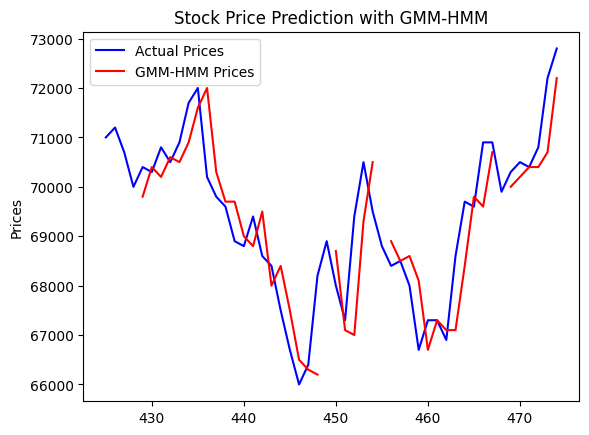

MSE:  773953.4883720931
MAE:  674.4186046511628
MAE%:  0.009728435636974958
R2 Score:  0.7183191742317474
MAPE:  0.9688288988216353


In [66]:
#Plot
plt.plot(df[df['Date'] > '31-08-2023']['Close'], label='Actual Prices', c='b')
plt.plot(df['PredictedPrices'], label='GMM-HMM Prices', c='r')
plt.title('Stock Price Prediction with GMM-HMM')
plt.ylabel('Prices')
plt.legend()
plt.show()

#Metrics
y_true = df[~np.isnan(df['PredictedPrices'])]['Close'].tolist()
y_pred = df[~np.isnan(df['PredictedPrices'])]['PredictedPrices'].tolist()

print('MSE: ', metrics.mean_squared_error(y_true, y_pred))
print('MAE: ', metrics.mean_absolute_error(y_true, y_pred))
print('MAE%: ', metrics.mean_absolute_percentage_error(y_true, y_pred))
print('R2 Score: ', metrics.r2_score(y_true, y_pred))

mape = metrics.mean_absolute_percentage_error(test_data, fc) * 100
print('MAPE: ', mape)

# ARIMA

#### 1.1 Data

In [67]:
start_date = '2021-12-10'
end_date = '2023-11-17'

stock_code = '005930.KS' #Sk하이닉스: '00660.KS'
df = yf.download(stock_code, start=start_date, end=end_date)

data = df['Adj Close'][df['Volume'] != 0]

[*********************100%%**********************]  1 of 1 completed


#### 1.2 plot rolling

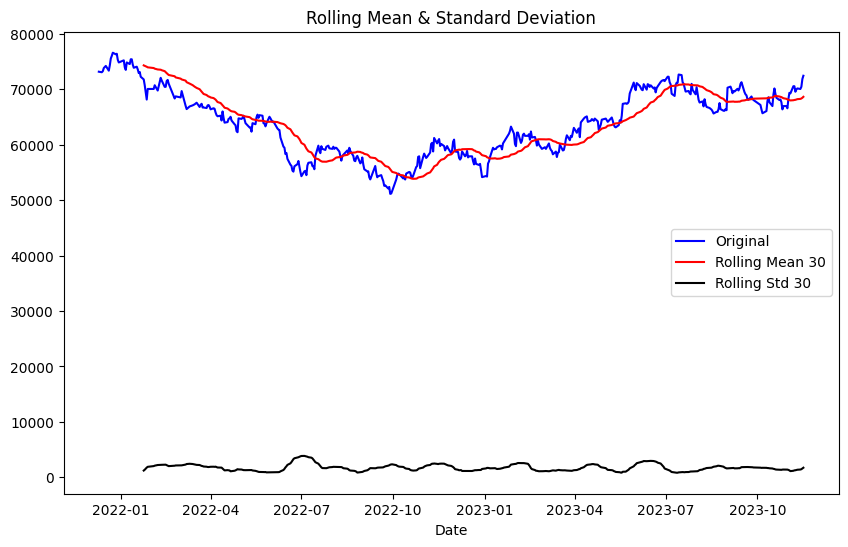

In [68]:
def plot_rolling(data, interval):
    rolmean = data.rolling(interval).mean()
    rolstd = data.rolling(interval).std()
    #Plot rolling statistics:
    plt.figure(figsize=(10, 6))
    plt.xlabel('Date')
    orig = plt.plot(data, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean {}'.format(interval))
    std = plt.plot(rolstd, color='black', label = 'Rolling Std {}'.format(interval))
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

plot_rolling(data, 30)

#### 2.1 ADF Test

In [69]:
def adf_test(data):
    result = adfuller(data.values)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    print('num of lags: %f' % result[2])
    print('num of observations: %f' % result[3])
    print('Critical values:')
    for k, v in result[4].items():
        print('\t%s: %.3f' % (k,v))

print('ADF TEST RESULT')
adf_test(data)

ADF TEST RESULT
ADF Statistics: -1.472993
p-value: 0.546827
num of lags: 2.000000
num of observations: 461.000000
Critical values:
	1%: -3.445
	5%: -2.868
	10%: -2.570


#### 2.2Intergrated

<Axes: xlabel='Date'>

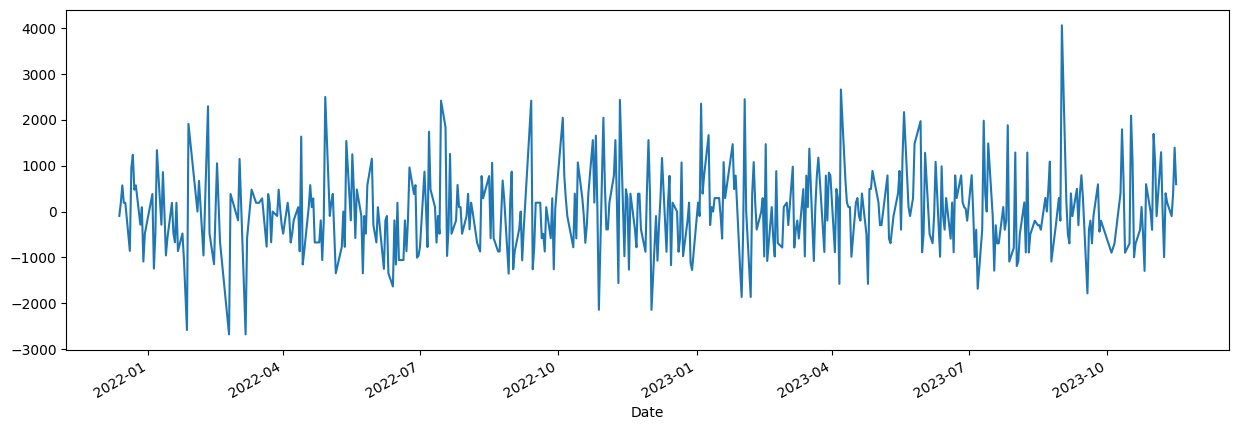

In [70]:
dff1 = data.diff().dropna()
dff1.plot(figsize=(15,5))

In [71]:
adf_test(dff1)

ADF Statistics: -17.501348
p-value: 0.000000
num of lags: 1.000000
num of observations: 461.000000
Critical values:
	1%: -3.445
	5%: -2.868
	10%: -2.570


#### 2.3 ARIMA(p,d,q) parameter

In [72]:
data = df['Close']
n_diffs = ndiffs(data, alpha=0.05, test='adf', max_d=6)
print(f"d = {n_diffs}")

d = 1


In [73]:
model = pm.auto_arima(
            y=data,
            d=1,
            start_p=0, max_p=3,
            start_q=0, max_q=3,
            m=1, seasonal=False,
            stepwise=True,
            trace=True
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7804.218, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7806.026, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7806.029, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7802.263, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7807.794, Time=0.62 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.980 seconds


3.1 Fit Train Data

In [74]:
train_data, test_data = data[:int(len(data)*0.9)], data[int(len(data)*0.9):]

model_fit = pm.auto_arima(
    	    y=train_data,
 	        d=n_diffs ,
            start_p=0, max_p=2,
            start_q=0, max_q=2,
            m=1, seasonal=False,
            stepwise=True,
            trace=True
)
print(model_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7021.434, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7023.078, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7023.079, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7019.526, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7024.887, Time=2.37 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.792 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  427
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -3508.763
Date:                Wed, 06 Mar 2024   AIC                           7019.526
Time:                        15:56:50   BIC                           7023.581
Sample:                             0   HQIC                          7021.128
                                - 427                                       

#### 3.2 Forecast Function

In [75]:
def forecast_n_step(model, n = 1):
    fc, conf_int = model.predict(n_periods=n, return_conf_int=True)
    # print("fc", fc,"conf_int", conf_int)
    return (
        fc.tolist()[0:n], np.asarray(conf_int).tolist()[0:n]
   )

def forecast(len, model, index, data=None):
    y_pred = []
    pred_upper = []
    pred_lower = []

    if data is not None:
        for new_ob in data:
            fc, conf = forecast_n_step(model)
            y_pred.append(fc[0])
            pred_upper.append(conf[0][1])
            pred_lower.append(conf[0][0])
            model.update(new_ob)
    else:
        for i in range(len):
            fc, conf = forecast_n_step(model)
            y_pred.append(fc[0])
            pred_upper.append(conf[0][1])
            pred_lower.append(conf[0][0])
            model.update(fc[0])
    return pd.Series(y_pred, index=index), pred_upper, pred_lower

#### 3.3 Forecast

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


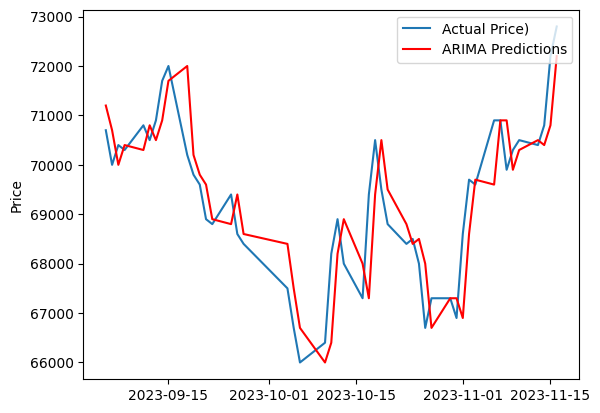

In [76]:
fc, upper, lower = forecast(len(test_data), model_fit, test_data.index, data = test_data)

plt.plot(test_data, label='Actual Price)')
plt.plot(fc, color='red',label='ARIMA Predictions')
plt.ylabel('Price')
plt.legend(loc='upper right')
plt.show()

#### 4.1 MAPE

In [77]:
log_test_data = np.log(test_data)
log_fc = np.log(fc)

mape = np.mean(np.abs(np.exp(log_fc) - np.exp(log_test_data)) / np.abs(np.exp(log_test_data)))
print('MAPE: ', '{:.5f}%'.format(mape * 100))

mape = metrics.mean_absolute_percentage_error(test_data, fc) * 100
print('MAPE: ', mape)

MAPE:  0.96883%
MAPE:  0.9688288988216353
